# Week 7 handin

## 01 Assignment
### Exercise 1
Go to this website: https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop
Use BeautifulSoup, to select the name and price for the laptops (hint: look for "product-list-container" to begin with).
Save the data, to be used for later.
### Exercise 2
Using Regular Expressions and the data from Exercise 1, find all laptops with the brand Asus.
Use Selenium to click on the most expensive Asus laptop, then find and print its graphics card, using BeautifulSoup.
### Exercise 3
Use the data from Exercise 2, to make a sorted bar chart of the laptops, where x-axis is names, and y-axis is price.

## 02 Status

Jeg har fået lavet exercise 1 og 3 og noget af 2 men ikke den del hvor man skal bruge selenium

## 03 Solution part 1 

In [1]:
import re
import bs4
import requests
import ast
import operator
import matplotlib.pyplot as plt
import json

In [2]:
# part 1
url = "https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop"
req = requests.get(url)
soup = bs4.BeautifulSoup(req.text, 'html.parser')

elems = soup.select('.col-infos')
titles_arr = []
prices_arr=[]

for e in elems:
    names = e.select(".product-name")
    prices = e.select(".product-price")
    for name in names:
        titles_arr.append(name.text.strip())
    for price in prices:
        txt = price.text.strip()
        price_regex = re.compile(r'^\d+\s+\d+')
        preg = price_regex.search(txt)
        prices_arr.append(preg.group(0).replace(u'\xa0', ''))


products=dict(zip(titles_arr, prices_arr))
products = {k: v for k, v in sorted(products.items(), key=lambda item: item[1])}
print(products)

print("------------------------------------------------")
string = json.dumps(products, ensure_ascii=False)
print(string)

{'Lenovo Legion 5 15,6" bærbar gaming computer R7/16/1000/3060/15-165': '11499', 'Asus TUF Gaming A17 FA706QM 17,3" bærbar gaming computer (grå)': '11999', 'Lenovo Legion 5 17" bærbar gaming computer R7/16/512/3060/17-144': '11999', 'Lenovo Legion 5 15,6" bærbar gaming computer R7/16/1000/3070/15-165': '12499', 'Lenovo Legion 5 17" bærbar gaming computer R7/16/1000/3070/17-144': '12999', 'Asus ZenBook Pro 15 UX535 15,6" bærbar computer i7/16/512/1650Ti/FHD': '13499', 'Asus ROG Strix G153QR 15,6" bærbar gaming computer (grå)': '15999', 'MSI GF63 Thin 9SCXR-1252NE 15,6" bærbar gaming computer (sort)': '4999', 'Lenovo IdeaPad Gaming 3 15ARH05 15,6" gaming bærbar R5/8/512/1650TI': '5999', 'MSI GF63 Thin 9SCSR-1255NE 15,6" bærbar gaming computer (sort)': '6999', 'HP Pavilion 15-ec1815no 15,6" bærbar gaming computer': '6999', 'HP Pavilion 15-ec1818no 15,6" bærbar computer': '6999', 'Asus TUF Gaming A15 FX506 15,6" bærbar gaming computer': '6999', 'Lenovo IdeaPad Gaming 3 15ARH05 15,6" gaming

['"Asus TUF Gaming A17 FA706QM 17,3\\" bærbar gaming computer (grå)": "11999"', '"Asus ZenBook Pro 15 UX535 15,6\\" bærbar computer i7/16/512/1650Ti/FHD": "13499"', '"Asus ROG Strix G153QR 15,6\\" bærbar gaming computer (grå)": "15999"', '"Asus TUF Gaming A15 FX506 15,6\\" bærbar gaming computer": "6999"', '"Asus TUF Gaming A15 FX506 15,6\\" gaming computer (sort)": "7999"', '"Asus TUF Gaming A17 FX706II-H7048T 17,3\\" bærbar gaming computer (grå)": "7999"', '"Asus TUF Gaming A15 FA506 15,6\\" bærbar computer R5/8/512/1660T": "7999"']
"Asus TUF Gaming A17 FA706QM 17,3\" bærbar gaming computer (grå)": "11999", "Asus ZenBook Pro 15 UX535 15,6\" bærbar computer i7/16/512/1650Ti/FHD": "13499", "Asus ROG Strix G153QR 15,6\" bærbar gaming computer (grå)": "15999", "Asus TUF Gaming A15 FX506 15,6\" bærbar gaming computer": "6999", "Asus TUF Gaming A15 FX506 15,6\" gaming computer (sort)": "7999", "Asus TUF Gaming A17 FX706II-H7048T 17,3\" bærbar gaming computer (grå)": "7999", "Asus TUF Gamin

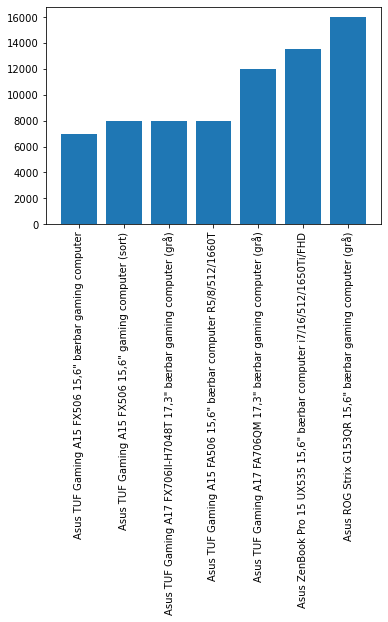

In [3]:
# part 2
asus = re.compile(r'"Asus.*?\d{3}"')

all_asus = asus.findall(string)
print(all_asus)
asu = ", ".join(all_asus)

print(asu)

asus_dict = ast.literal_eval("{"+asu+"}")
print("non sorted")
print(asus_dict)
for value in asus_dict:
    asus_dict[value] = int(asus_dict[value])
print(asus_dict)

asus_dict_sorted = dict( sorted(asus_dict.items(), key=operator.itemgetter(1)))
print("sorted list")
print(asus_dict_sorted)
asus_items = asus_dict_sorted.items()
first_item = list(asus_items)[:1]
(first_title, first_price) = first_item[0] 

print(first_title)
print(first_price)

plt.xticks(rotation=90)
plt.bar(asus_dict_sorted.keys(),asus_dict_sorted.values())
plt.show()